# Load/import libraries

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import os

%load_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
from preprocess import *
from lasso_fits import *
from rf_fits import *

## Download data for Rm = $1.5 \times 10^4$

In [6]:
!wget -O mfields_R15e3.npz https://sid.erda.dk/public/archives/0cf0c2b6d34e20da8971304b06d8f913/pencil/alpha2/shock_k10_R15000_256_xyaver_alpha_eta/mfields.npz

--2019-05-20 23:39:13--  https://sid.erda.dk/public/archives/0cf0c2b6d34e20da8971304b06d8f913/pencil/alpha2/shock_k10_R15000_256_xyaver_alpha_eta/mfields.npz
Resolving sid.erda.dk (sid.erda.dk)... 130.225.104.13
Connecting to sid.erda.dk (sid.erda.dk)|130.225.104.13|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 65800718 (63M)
Saving to: ‘mfields_R15e3.npz’

mfields_R15e3.npz   100%[===================>]  62.75M  2.44MB/s    in 24s     

2019-05-20 23:39:53 (2.61 MB/s) - ‘mfields_R15e3.npz’ saved [65800718/65800718]



In [7]:
# Time in resistive units for Rm=15e4 run
mf15 = np.load('mfields_R15e3.npz')
tres_R15e4=mf15['tt']/mf15['tres']
print(mf15['tres'])

149.09657903158052


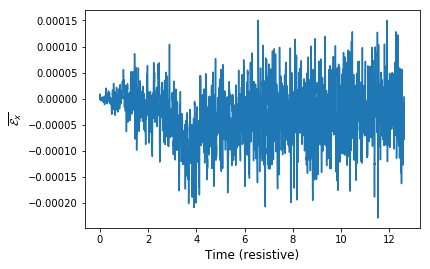

In [8]:
plt.plot(mf15['tt']/mf15['tres'],mf15['emfx'][:,192])
plt.xlabel('Time (resistive)', fontsize=12)
plt.ylabel(r'$\overline{\mathcal{E}_x}$', fontsize=12)
plt.savefig('emfx.pdf', bbox_inches='tight')

In [9]:
df15 = gen_df_zave_log(fname='mfields_R15e3.npz',z1=0)#,verbose=0)
#df05 = gen_df_zave_log(fname=pth + 'mfields_R5e2.npz', z1=0)#,verbose=0)

Generating z averaged dataframe with z1: 0 and z2: -1


/home/fnauman/python3/sklearn/paper_nbs/preprocess.py:155: RuntimeWarning: divide by zero encountered in log10
  'Ex2l': np.log10(ave_z(Exm**2,zone=z1,ztwo=z2)),
/home/fnauman/python3/sklearn/paper_nbs/preprocess.py:156: RuntimeWarning: divide by zero encountered in log10
  'Ey2l': np.log10(ave_z(Eym**2,zone=z1,ztwo=z2))


In [10]:
bxm,bym,jxm,jym,Exm,Eym = read_mf_norm(fname='mfields_R15e3.npz')

In [11]:
t1 = 0
t2 = -1
n_win = 20

In [12]:
me = (mf15['bxm'][n_win:-2]**2 + mf15['bym'][n_win:-2]**2)

In [13]:
# Rolling mean of the EMF

Ex2l_rolmean = df15['Ex2l'].iloc[t1:t2].rolling(window=n_win).mean()

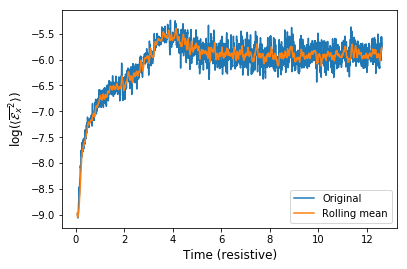

In [14]:
plt.plot(tres_R15e4[n_win:-2],np.log10(np.mean(mf15['emfx'][n_win:-2]**2,axis=1)/mf15['uave']**2), label='Original')
plt.plot(tres_R15e4[n_win:-2],Ex2l_rolmean[n_win:-1], label='Rolling mean')
plt.xlabel('Time (resistive)', fontsize=12)
plt.ylabel(r'$\log(\langle\overline{\mathcal{E}_x}^2\rangle)$', fontsize=12)
plt.legend()
plt.savefig('emfx2.pdf', bbox_inches='tight')

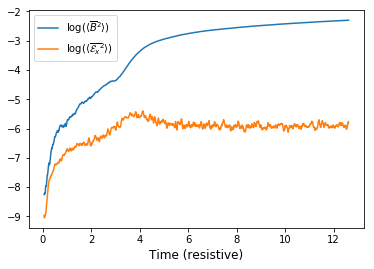

In [15]:
plt.plot(tres_R15e4[n_win:-2],np.log10(np.mean(me,axis=1)),label=r'$\log(\langle\overline{B}^2\rangle)$')  
#plt.plot(tres_R15e4[n_win:-2],np.log10(np.mean(mf15['emfx'][n_win:-2]**2/mf15['uave']**2,axis=1)), label='Original')
plt.plot(tres_R15e4[n_win:-2],Ex2l_rolmean[n_win:-1], label=r'$\log(\langle\overline{\mathcal{E}_x}^2\rangle)$')
plt.xlabel('Time (resistive)', fontsize=12)
#plt.ylabel(r'$\log(\langle\overline{\mathcal{E}_x}^2\rangle)$', fontsize=12)
plt.legend()
plt.savefig('log_emf_vs_b2.pdf', bbox_inches='tight')

In [16]:
t3 = int(2.0 * mf15['tres'])
Ex2l_kin_rolmean = df15['Ex2l'].iloc[t1:t3].rolling(window=n_win).mean()
#Ex2l_kin_rolmean.head(n_win)

t4 = int(8.0 * mf15['tres'])
Ex2l_sat_rolmean = df15['Ex2l'].iloc[t1:t4].rolling(window=n_win).mean()
#Ex2l_rolmean.iloc[n_win:].isna().sum() = 0

In [17]:
df_kin_win = (df15[t1:t3]).copy()
df_sat_win = (df15[t1:t4]).copy()

In [18]:
df_kin_win['Ex2l'] = Ex2l_kin_rolmean
df_sat_win['Ex2l'] = Ex2l_sat_rolmean

In [19]:
df_kin_win_nona = df_kin_win.iloc[n_win:,:]
df_sat_win_nona = df_sat_win.iloc[n_win:,:]

In [20]:
#df_sat_win.head()
df_kin_win_nona.tail()

,Bx2l,By2l,Jx2l,Jy2l,Ex2l,Ey2l
293,-3.671680,-3.718823,-1.464373,-1.484611,-6.886859,-7.095296
294,-3.670880,-3.725742,-1.469945,-1.469727,-6.882266,-6.950773
295,-3.668285,-3.723739,-1.475501,-1.475302,-6.872266,-6.817544
296,-3.666288,-3.718188,-1.487381,-1.464201,-6.867582,-6.765932
297,-3.667119,-3.707442,-1.488803,-1.438968,-6.860983,-6.802452


# Lasso

Test size: 0.2
Test,train shapes: (56, 4) (222, 4)
Fitting 2 folds for each of 5 candidates, totalling 10 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  10 out of  10 | elapsed:    0.8s finished


Means of CV folds: [-0.12670469 -0.12541227 -0.09858568 -0.14696874 -0.29064614]
STDs of CV folds : [0.00870471 0.01080069 0.00231669 0.05008164 0.18554816]
   mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0       0.002296      0.000029         0.000830        0.000054   
1       0.002042      0.000017         0.000790        0.000114   
2       0.001770      0.000164         0.000660        0.000039   
3       0.001958      0.000031         0.000743        0.000002   
4       0.001513      0.000017         0.000666        0.000002   

  param_lasso__alpha                   params  split0_test_score  \
0              0.001  {'lasso__alpha': 0.001}          -0.118000   
1               0.01   {'lasso__alpha': 0.01}          -0.114612   
2                0.1    {'lasso__alpha': 0.1}          -0.100902   
3                0.5    {'lasso__alpha': 0.5}          -0.096887   
4                  1    {'lasso__alpha': 1.0}          -0.105098   

   split1_test_score  mean_test

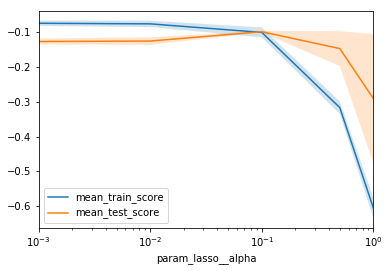

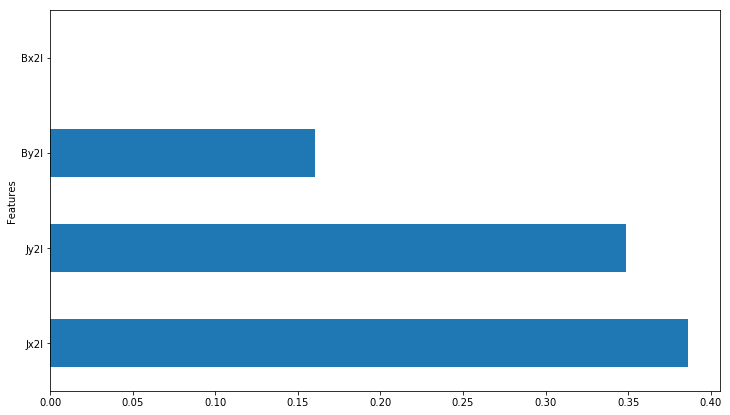

In [21]:
# Change df_kin to df_sat for saturated fits!!
df15_ss, scl_las = scale_df(df_kin_win_nona)
y_train_lasso,y_pred_lasso,y_test_lasso = lasso_gridcv(df15_ss, test_size=0.2, fld='Ex2l',zave=True)

# Random forests

Test size: 0.2
Test,train shapes: (56, 4) (222, 4)
Fitting 2 folds for each of 72 candidates, totalling 144 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done 144 out of 144 | elapsed:    0.6s finished


Means of CV folds: [-0.04674591 -0.04674591 -0.04674591 -0.04674591 -0.05220014 -0.05220014
 -0.05220014 -0.05220014 -0.07760536 -0.07760536 -0.07760536 -0.07760536
 -0.04734483 -0.04745476 -0.047457   -0.04743752 -0.05516812 -0.05493326
 -0.05494913 -0.05441792 -0.07752484 -0.07809775 -0.07794051 -0.07805598
 -0.04674591 -0.04674591 -0.04674591 -0.04674591 -0.05220014 -0.05220014
 -0.05220014 -0.05220014 -0.07760536 -0.07760536 -0.07760536 -0.07760536
 -0.04516885 -0.04517881 -0.04519179 -0.04519179 -0.05220014 -0.05220014
 -0.05220014 -0.05220014 -0.07760536 -0.07760536 -0.07760536 -0.07760536
 -0.04462999 -0.04517994 -0.04512423 -0.04540001 -0.05445658 -0.05423968
 -0.05496942 -0.05357525 -0.07752484 -0.07809775 -0.07794051 -0.07805598
 -0.04516885 -0.04517881 -0.04519179 -0.04519179 -0.05220014 -0.05220014
 -0.05220014 -0.05220014 -0.07760536 -0.07760536 -0.07760536 -0.07760536]
STDs of CV folds : [0.03114837 0.03114837 0.03114837 0.03114837 0.0366026  0.0366026
 0.0366026  0.03660

<Figure size 432x288 with 0 Axes>

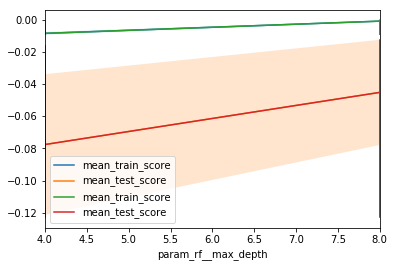

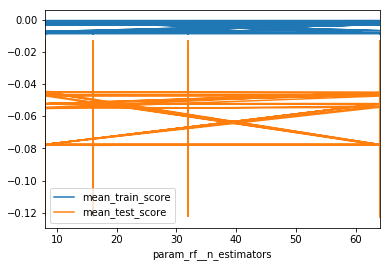

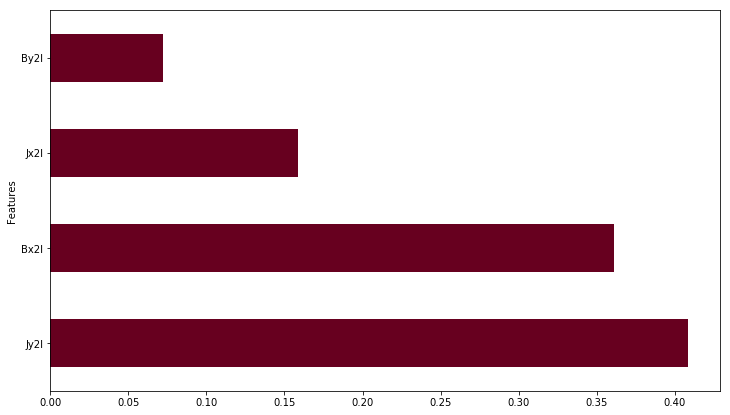

In [22]:
# Change df_kin to df_sat for saturated fits!!
y_train_rf,y_pred_rf,y_test_rf = rf_gridcv(df_kin_win_nona, fld='Ex2l', zave=True, err_metric='mse')

In [23]:
tres_plt = tres_R15e4[n_win:y_train_rf.shape[0] + n_win + y_pred_rf.shape[0]]

print(df_sat_win_nona['Ex2l'].shape, tres_plt.shape)

(1172,) (278,)


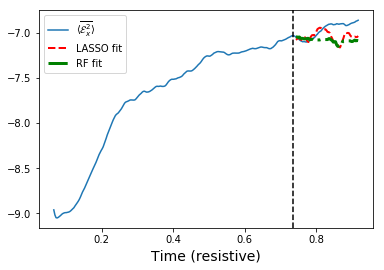

In [24]:
fig, ax = plt.subplots()
        
y_pred_lasso2 = y_pred_lasso * scl_las.scale_[np.newaxis,4] + scl_las.mean_[np.newaxis,4]
    
fld_label = r"$\langle \overline{\mathcal{E}_x^2}\rangle$" #if fld=='Ex' else r"$\mathcal{E}_y$"
        
# Change df_kin to df_sat for saturated fits!!
ax.plot(tres_plt,df_kin_win_nona['Ex2l'],label=fld_label)
#ax.plot(tres_plt[:y_train.shape[0]],y_trainrf,'r',lw=3,label="Train data")
#ax.plot(tres_plt[y_train.shape[0]:],y_testrf,label="Test data")
ax.plot(tres_plt[y_train_lasso.shape[0]:], y_pred_lasso2, 'r--', lw=2, label="LASSO fit")
ax.plot(tres_plt[y_train_rf.shape[0]:], y_pred_rf, 'g-.', lw=3, label="RF fit")
plt.axvline(x=0.8*tres_plt[-1], color='k', linestyle='--')

ax.legend()
ax.set_xlabel('Time (resistive)',fontsize=14)
    
fig.savefig('df15_TIME_kin_comparison.pdf',bbox_inches='tight')

In [ ]:
list(mf15)